### A project to determine flight delays
Participants:\
Chheang Duong\
Christian Rolph\
Jacob Chesnut

In [57]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# define paths to data
combinedFlights2018 = "archive\Combined_Flights_2018.csv"
combinedFlights2019 = 'archive\Combined_Flights_2019.csv'
combinedFlights2020 = 'archive\Combined_Flights_2020.csv'
combinedFlights2021 = 'archive\Combined_Flights_2021.csv'
combinedFlights2022 = 'archive\Combined_Flights_2022.csv'

In [59]:
# import datasets
dataFrame18=pd.read_csv(combinedFlights2018)

The ArrDelayMinutes feature shows the difference in minutes between scheduled and actual arrival time. Early arrivals are set to 0. We'll plot this feature to see the distrobution.

In [60]:
# Needed Functions

# Simple understanding of ArrDelayMinutes min/max
def GetDelayValues(dataFrame):
    maxValue = dataFrame['ArrDelayMinutes'].max()
    minValue = dataFrame['ArrDelayMinutes'].min()
    print(f"Longest Delay: {maxValue} minutes")
    print(f"Shortest Delay: {minValue} minutes")

# Function to show DataFrame basic info
def ShowBasicDataFrameInfo(dataFrame):
    print("DataFrame Info")
    print(dataFrame.info())
    print("DataFrame Describe")
    print(dataFrame.describe())
    print("DataFrame Head")
    print(dataFrame.head())

In [61]:
ShowBasicDataFrameInfo(dataFrame18)

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689512 entries, 0 to 5689511
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  Act

In [62]:
def PrintInvalidEntriesForArrDelayMinutes(dataFrame):
    totalEntries = dataFrame.ArrDelayMinutes.shape[0]
    numInvalidEntries = dataFrame.ArrDelayMinutes.isnull().sum()
    print(f"There are {totalEntries:,} total entries for ArrDelayMinutes")
    print(f"Of those, there are {numInvalidEntries:,} NaN entries for ArrDelayMinutes")

def RemoveRowsWithInvalidDataForArrDelayMinutes(dataFrame):
    print("Before cleaning:")
    PrintInvalidEntriesForArrDelayMinutes(dataFrame)
    cleanedDataFrame = dataFrame.dropna(subset=['ArrDelayMinutes'])
    print()

    print("After cleaning:")
    PrintInvalidEntriesForArrDelayMinutes(cleanedDataFrame)
    return cleanedDataFrame

    
dataFrame18 = RemoveRowsWithInvalidDataForArrDelayMinutes(dataFrame18)

Before cleaning:
There are 5,689,512 total entries for ArrDelayMinutes
Of those, there are 102,893 NaN entries for ArrDelayMinutes

After cleaning:
There are 5,586,619 total entries for ArrDelayMinutes
Of those, there are 0 NaN entries for ArrDelayMinutes


Longest Delay: 2635.0 minutes
Shortest Delay: 0.0 minutes


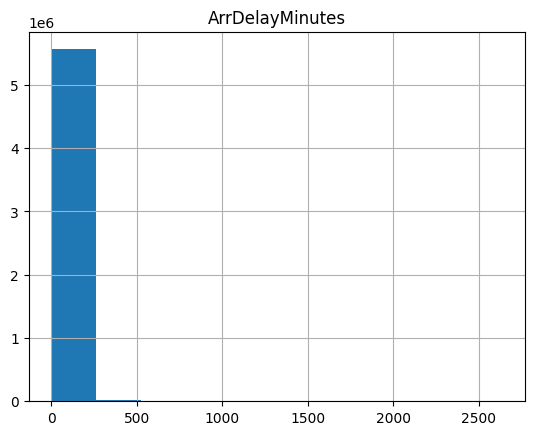

In [63]:
GetDelayValues(dataFrame18)

def ShowHistArrDelayMinutes(dataFrame):
    dataFrame.hist(column='ArrDelayMinutes')

ShowHistArrDelayMinutes(dataFrame18)


The number of on-time flights significantly overshadows the other data. We'll replot to show occurances other than on-time.

In [66]:
def RemoveEntriesForOnTimeOrEarlyFlights(dataFrame):
    totalEntries = dataFrame.ArrDelayMinutes.shape[0]
    print(f"There are {totalEntries:,} total entries for AddDelayMinutes.")
    print(f"Of those, {dataFrame.ArrDelayMinutes.value_counts()[0]:,} are on-time or early flights.")

    dataFrameClean = dataFrame[dataFrame.ArrDelayMinutes != 0]
    totalEntries = dataFrameClean.ArrDelayMinutes.shape[0]

    print(f"After removing on-time or early flights, there are now {totalEntries:,} total entries for ArrDelayMinutes")
    return dataFrameClean

cleanDataFrame = RemoveEntriesForOnTimeOrEarlyFlights(dataFrame18)

There are 5,586,619 total entries for AddDelayMinutes.
Of those, 3,576,135 are on-time or early flights.
After removing on-time or early flights, there are now 2,010,484 total entries for ArrDelayMinutes


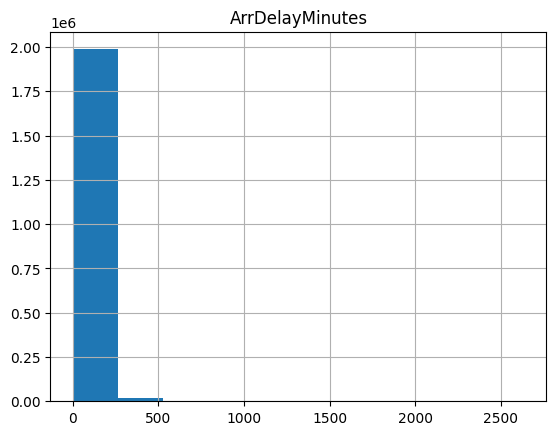

In [67]:
# Redo histogram
ShowHistArrDelayMinutes(cleanDataFrame)

Even after removing the on-time flights. Almost all delays were less than 4hrs long. This makes sense since even a 4hr delay would be very excessive.